# Leaky Integrate and Fire model Simulation

In [2]:
#import libraries and modules
from numpy import*
from pylab import *

In [111]:
#Simulation Parameters
T=100 # total simulation time in msec
dt=0.125 # step size in msec
time=arange(0,T+dt,dt) #step value in msec

### Current Functions 

I1 = 2uA for 10ms <= t <= 75ms; I = 0Amp otherwise

In [42]:
def I1():
    I=np.zeros(len(time))
    I[80:600]=2
    return I

 I2 = 1.5uA for 0ms <= t <= 100ms

In [39]:
def I2():
    I=np.zeros(len(time))
    I.fill(1.5)
    return I
    

 I3 = 5sin(ωt) uA where ω = 45 deg/msec


In [287]:
def I3():
    w=45*pi/180
    I=5*np.sin(w*time)
    return I


I4 = -2sin(ω1t) + 3sin(ω2t) + cos(ω3t) uA where ω1 = 45 deg/msec
, ω2 = 60 deg/msec , ω3 = 30 deg/msec



In [288]:
def I4():
    w1=45*pi/180
    w2=60*pi/180
    w3=30*pi/180
    I=-2*sin(w1*time)+3*sin(w2*time)+cos(w3*time)
    #for t in range(0,len(time),8):
     #   I[t]=-2*sin(w1*0.125*t)+3*sin(w2*0.125*t)+cos(w3*0.125*t)
        #print(t*0.125)
        #print(I[t])
    return I
    
    

In [313]:
#testing for random gaussian noise
#def I5():
#    I=[]
#    for t in range(len(time)):
 #       I.append(np.random.normal(1.5,1))
#    return I

In [ ]:
#plot(time,I5())

In [ ]:
#Spike5,Vm5,v_firing5=simulate(I5())
#voltage_plot(Vm5,time)
#spike_plot(Spike5,time)

### Input Current vs Time graph

In [79]:
def graph_plot_current(current,time):
    plot(time,current)
    title('Input Current vs time graph')
    ylabel('Input Current (I)in uA')
    xlabel('Time (msec)')
    
    show()
    

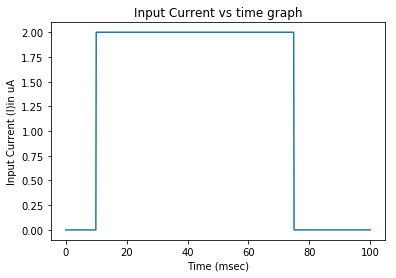

In [80]:
graph_plot_current(I1(),time)  # graph of I1 vs time 

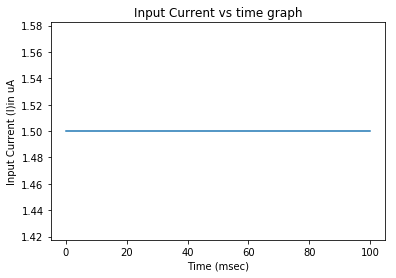

In [81]:
graph_plot_current(I2(),time) # graph of I2 vs time

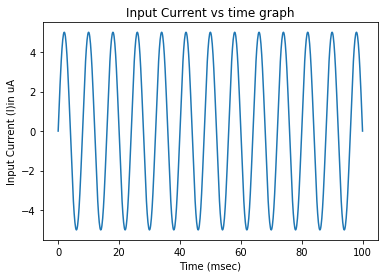

In [290]:
graph_plot_current(I3(),time) # graph of I3 vs time

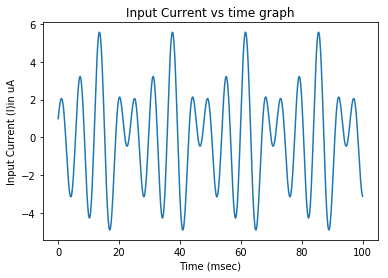

In [291]:
graph_plot_current(I4(),time) #graph of I4 vs time

### Simulation configuration


In [354]:
Vm=zeros(len(time)) #Membrane Potential in V
#print(Vm)
Rm=2         # Resistance in kOhm
Cm=5         # Capacitance in uF
tau_m=Rm*Cm  # Time constant 
tau_ref=5    # Refractory time period in msec
Vth=1    #spike threshold in V
Vrest=0      #resting potential
V_spike=1    # Spike delta in V
t_rest=0     # initial refractory time 
spikes=zeros(len(time))  #output spikes for the neuron
t_spike=zeros(len(time))
v_firing=zeros(len(time))

### Simulation

In [365]:

def simulate(I):
    #simulation parameters
    Rm=2
    Cm=5
    tau_m=Rm*Cm
    tau_ref=5
    Vth=1
    V_spike=1
    t_rest=0
    Vrest=0
    Vm=zeros(len(time))
    spikes=zeros(len(time))
    t_spike=zeros(len(time))
    v_firing=zeros(len(time))
    t_s=[]
    num_spikes=0                                                    # counts no of spikes
    # iterate over each time step
    for i,t in enumerate(time): 
        #print(i, t)
        if(t>t_rest):
        
            Vm[i]=Vm[i-1]+(I[i]*Rm -Vm[i-1])/tau_m*dt               #I - V/R = C * dV/dT where tau_m=RC
        
            #when neuron potential exceed threshold
            if(Vm[i]>=Vth):
                t_s.append(i)
                t_spike[i]=tau_ref+tau_m*log(Rm*I[i]/(Rm*I[i]-Vth)) # time of spike   T = τref+ τm ln( R I0/R I0-Vth)

                v_firing[i]=1/t_spike[i]                            #frequency of firing
                
                num_spikes+=1
                
                Vm[i-1]=V_spike                                     # setting to spike value
                Vm[i]=Vrest                                         # setting to vrest value
                
                spikes[i]+=V_spike
                #Vm[i]+=V_spike
                t_rest=t+tau_ref
    
    return (spikes,Vm,v_firing,num_spikes)
    
    
 
    


In [267]:
#print(num_spikes)

In [266]:
#fig=plt.figure()
#ax=fig.add_axes([1,1,2,2])
#ax.scatter(v_firing, I2(), color='r')

### Voltage and Spike vs time plot for different Currents

In [356]:
def voltage_plot(voltage,time):
    plot(time,voltage)
    plt.axhline(y=1, color='r', linestyle='-')
    title('Leaky Integrate and Fire ')
    ylabel('Membrane Potential (V)')
    xlabel('Time (msec)')
    show()

In [357]:
def spike_plot(spikes,time):
    plot(time,spikes)
    plt.axhline(y=1, color='r', linestyle='-')
    title('Leaky Integrate and Fire ')
    ylabel('Spike (V)')
    xlabel('Time (msec)')
    show()

Spike Voltage and Membrane potential for I1 vs time graph

No of Spikes within the time frame : 8



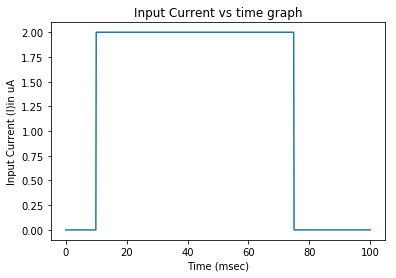

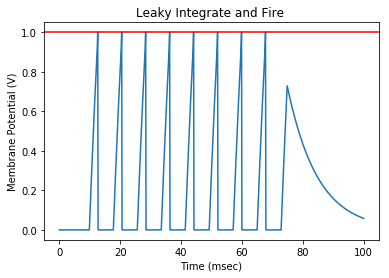

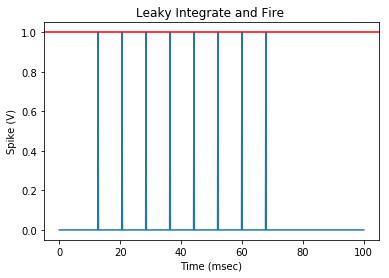

In [382]:
#for I1
Spike1,Vm1,v_firing,num_spikes=simulate(I1())

print('No of Spikes within the time frame :',num_spikes)
print()
graph_plot_current(I1(),time) 
voltage_plot(Vm1,time)
spike_plot(Spike1,time)


Spike Voltage and Membrane potential for I2 vs time graph

No of Spikes within the time frame : 11



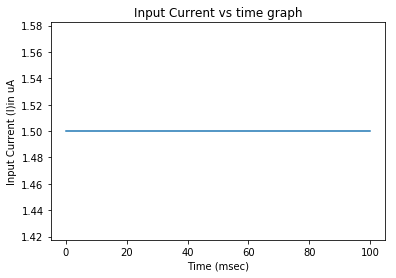

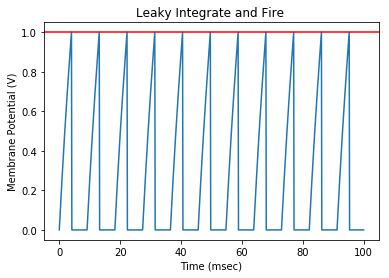

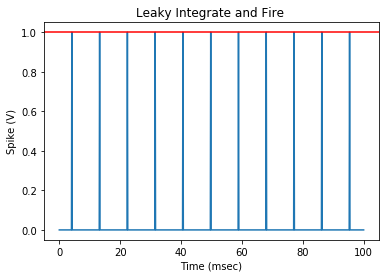

In [381]:
#for I2
Spike2,Vm2,v_firing2,num_spikes2=simulate(I2())
print('No of Spikes within the time frame :',num_spikes2)
print()
graph_plot_current(I2(),time) 
voltage_plot(Vm2,time)
spike_plot(Spike2,time)

Spike Voltage and Membrane potential for I3 vs time graph

No of Spikes within the time frame : 13



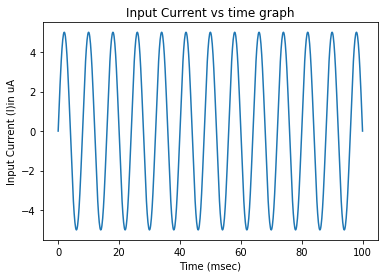

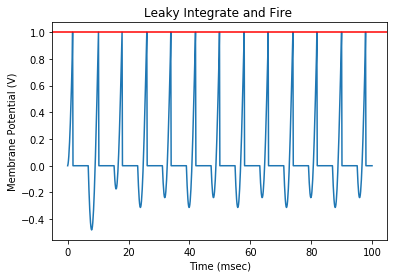

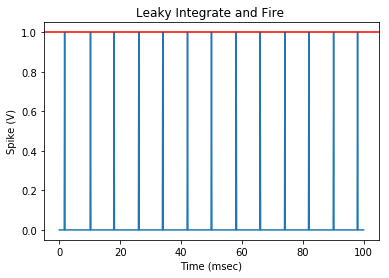

In [380]:
#for I3
Spike3,Vm3,v_firing3,num_spikes3=simulate(I3())
print('No of Spikes within the time frame :',num_spikes3)
print()
graph_plot_current(I3(),time) 
voltage_plot(Vm3,time)
spike_plot(Spike3,time)

Spike Voltage and Membrane potential  for I4 vs time graph

No of Spikes within the time frame : 8



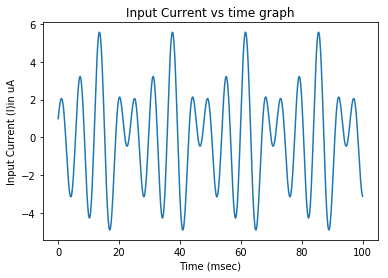

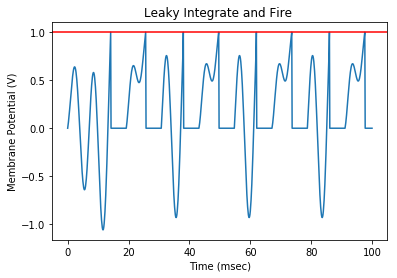

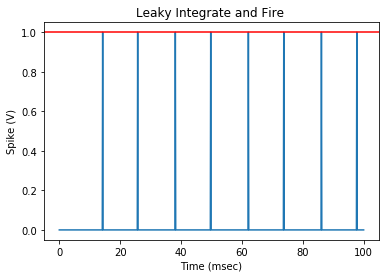

In [379]:
#for I4
Spike4,Vm4,v_firing4,num_spikes4=simulate(I4())
print('No of Spikes within the time frame :',num_spikes4)
print()
graph_plot_current(I4(),time) 
voltage_plot(Vm4,time)
spike_plot(Spike4,time)
    

### Dependency of v_firing vs I curve

In [263]:

Current=[]
Freq=[]
def freq_vs_current():
    I=0.5
    for i in range(150):
        Current.append(I)
        spike_time=tau_ref+tau_m*log(Rm*I/(Rm*I-Vth)) 
        firing_freq=1/spike_time  #firing rate
        Freq.append(firing_freq)
        I+=0.5
        
     
    return Current,Freq
        
        
        
Current,Freq=freq_vs_current()       

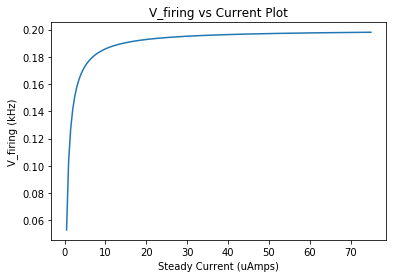

In [264]:
#V-firing vs I plot
plot(Current,Freq)
title('V_firing vs Current Plot')
ylabel('V_firing (kHz)')
xlabel('Steady Current (uAmps)')
show()


### Analysis:

We can clearly see the Spike train and no of spikes generated for each different type of current functions in each different plot where red line denotes the Vthreshold voltage.

For I1 when there is trigerring of of Current pulse from O to 2 the spike train starts and ends on the end of current pulse

For I2 there is a constant current value hence after each Vreset the spike are produced periodically 

For I3 there is Spike generation when ever there is a low to high current transition towards positive Amplitude.

For I4 there are 4 spikes generated for 4 large current value transition ie maximum amplitude to min amplitude and other 4 spikes are generated between each of those transitions when the summation of membrane potential reached Vth.


From the plot of V_firing frequency and Current we can observe that with increasing Steady current amplitude there is an increase in firing rate hyperbolically